## circutiti_2

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append("D:/Progetti/LabProgram")
from Routine import Routine
from Funnel import Funnel 
import lab_utilities as lu
from pyroot import *
from scipy.optimize import curve_fit
from scipy.cluster.vq import kmeans2
from scipy import stats

In [12]:
lu.setDefaultGraphStyle(size=(10,7))

## Circuito RC

In [16]:
data_RC = pd.read_csv("data/RC/F0001CH2.CSV")
data_RC_gen = pd.read_csv("data/RC/F0001CH1.CSV")

data_RC = data_RC.iloc[18:, 3:-1]
data_RC_gen = data_RC_gen.iloc[18:, 3:-1]
data_RC.columns = ["time", "voltage"]
data_RC_gen.columns = ["time", "voltage"]

In [17]:
#difference between the voltage of the RC and the voltage of the generator
voltage_capacitor = data_RC_gen["voltage"].values - data_RC["voltage"].values
time_capacitor = data_RC_gen["time"].values

In [19]:
#Separete charge and discharge
time_rc_charge = time_capacitor[162:len(time_capacitor)//2 -55]
voltage_rc_charge = voltage_capacitor[162:len(voltage_capacitor)//2 - 55]
time_rc_discharge = time_capacitor[len(time_capacitor)//2 -50 : -240]
voltage_rc_discharge = voltage_capacitor[len(voltage_capacitor)//2 - 50 : -240]

#Shift the discharge so that the first point is at time = 0
time_rc_discharge = time_rc_discharge - time_rc_discharge[0]

<ErrorbarContainer object of 3 artists>

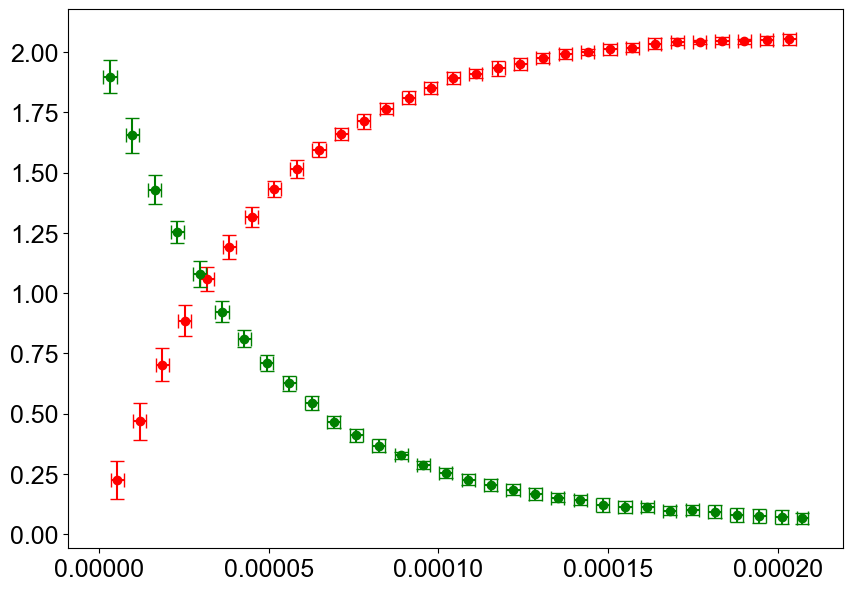

In [20]:
#cluster data
nop = 31
time_rc_charge_clust, voltage_rc_charge_clust, error_rc_charge_t_clust, error_rc_charge_v_clust = lu.simple_sampling(time_rc_charge, voltage_rc_charge, nop)
time_rc_discharge_clust, voltage_rc_discharge_clust, error_rc_discharge_t_clust, error_rc_discharge_v_clust = lu.simple_sampling(time_rc_discharge, voltage_rc_discharge, nop)
#plot as points with error bars
plt.errorbar(time_rc_charge_clust, voltage_rc_charge_clust, xerr=error_rc_charge_t_clust, yerr=error_rc_charge_v_clust, marker="o", linestyle="None", color="r")
plt.errorbar(time_rc_discharge_clust, voltage_rc_discharge_clust, xerr=error_rc_discharge_t_clust, yerr=error_rc_discharge_v_clust, marker="o", linestyle="None", color="g")


In [21]:
# Save elaborated data
data_rc_charge_clust = pd.DataFrame({"t":time_rc_charge_clust, "V":voltage_rc_charge_clust, "error_t":error_rc_charge_t_clust, "error_v":error_rc_charge_v_clust})
data_rc_discharge_clust = pd.DataFrame({"t":time_rc_discharge_clust, "V":voltage_rc_discharge_clust, "error_t":error_rc_discharge_t_clust, "error_v":error_rc_discharge_v_clust})
data_rc_charge_clust.to_csv("data/RC/charge_clust.csv", index=False)
data_rc_discharge_clust.to_csv("data/RC/discharge_clust.csv", index=False)

t-test

In [23]:
from scipy.stats import norm

In [27]:
#z-test on tau carica,scarica vs calculated tau
tau_calculated = 4.23e-5
error_tau_calculated = 0.10e-5

#charge
tau_carica = 4.45e-5
error_tau_carica = 0.09e-5
t_c = (tau_carica - tau_calculated)/np.sqrt(error_tau_carica**2 + error_tau_calculated**2)
p_c = 2*(1 - norm.cdf(t_c))
print("t-test on tau carica vs calculated tau: t = %f, p = %f" % (t_c, p_c))

#discharge
tau_scarica = 5.2e-5
error_tau_scarica = 0.12e-5
t_s = (tau_scarica - tau_calculated)/np.sqrt(error_tau_scarica**2 + error_tau_calculated**2)
p_s = 2*(1 - norm.cdf(t_s))
print("t-test on tau scarica vs calculated tau: t = %f, p = %f" % (t_s, p_s))
print(p_s)

t-test on tau carica vs calculated tau: t = 1.635247, p = 0.101997
t-test on tau scarica vs calculated tau: t = 6.209789, p = 0.000000
5.305589301229929e-10


In [66]:
print(stats.t.sf(1.63, 1))

0.1751610446541856


## Circuito RL

In [30]:
data_RL = pd.read_csv("data/RL/F0000CH2.CSV")
data_RL_gen = pd.read_csv("data/RL/F0000CH1.CSV")

data_RL = data_RL.iloc[18:, 3:-1]
data_RL_gen = data_RL_gen.iloc[18:, 3:-1]
data_RL.columns = ["time", "voltage"]
data_RL_gen.columns = ["time", "voltage"]

In [34]:
#Separete charge and discharge
time_rl_charge = data_RL["time"][185:1200]
voltage_rl_charge = data_RL["voltage"][185:1200]

time_rl_discharge = data_RL["time"][1230:2300]
voltage_rl_discharge = data_RL["voltage"][1230:2300]

#Shift the discharge so that the first point is at time = 0 (they must be converted to list to be able to do the operation)
time_rl_discharge = time_rl_discharge.values.tolist()
time_rl_discharge = [x - time_rl_discharge[0] for x in time_rl_discharge]

<ErrorbarContainer object of 3 artists>

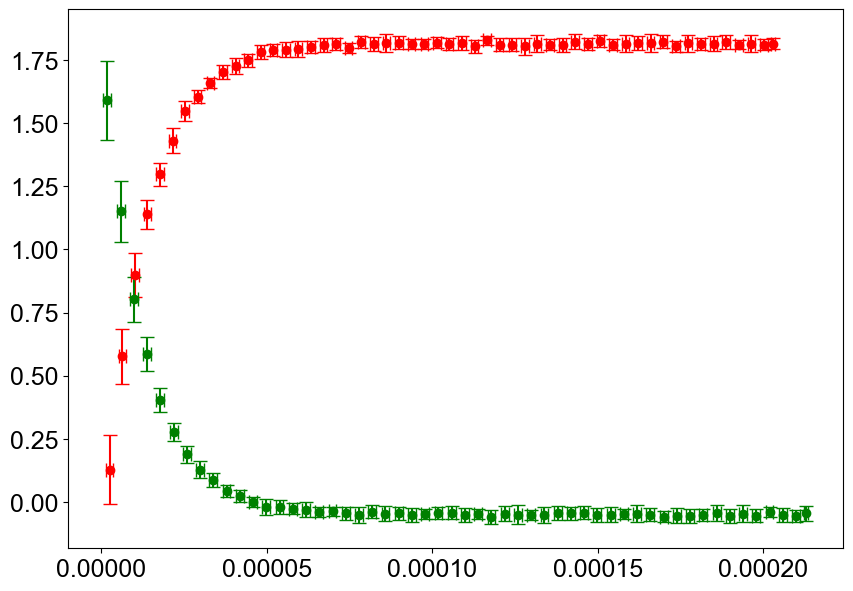

In [38]:
#cluster data
nop = 51
time_rl_charge_clust, voltage_rl_charge_clust, error_rl_charge_t_clust, error_rl_charge_v_clust = lu.simple_sampling(time_rl_charge, voltage_rl_charge, nop)
time_rl_discharge_clust, voltage_rl_discharge_clust, error_rl_discharge_t_clust, error_rl_discharge_v_clust = lu.simple_sampling(time_rl_discharge, voltage_rl_discharge, nop)
#plot as points with error bars
plt.errorbar(time_rl_charge_clust, voltage_rl_charge_clust, xerr=error_rl_charge_t_clust, yerr=error_rl_charge_v_clust, marker="o", linestyle="None", color="r")
plt.errorbar(time_rl_discharge_clust, voltage_rl_discharge_clust, xerr=error_rl_discharge_t_clust, yerr=error_rl_discharge_v_clust, marker="o", linestyle="None", color="g")

In [39]:
# Save elaborated data
data_rl_charge_clust = pd.DataFrame({"t":time_rl_charge_clust, "V":voltage_rl_charge_clust, "error_t":error_rl_charge_t_clust, "error_v":error_rl_charge_v_clust})
data_rl_discharge_clust = pd.DataFrame({"t":time_rl_discharge_clust, "V":voltage_rl_discharge_clust, "error_t":error_rl_discharge_t_clust, "error_v":error_rl_discharge_v_clust})
data_rl_charge_clust.to_csv("data/RL/charge_clust.csv", index=False)
data_rl_discharge_clust.to_csv("data/RL/discharge_clust.csv", index=False)